In [1]:
# Necessary imports for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

# Homework 1
### By Andrei Stefan 

## Exercise 1: CLT
In order to reproduce the results for the assignment, we define the generator for $Z$ as the sum of $n$ random Bernoulli variables. The results have been plotted below and match the ones on the slide.

In [2]:
class ZBernoulli:
    def __init__(self,n,p):
        self.n=n
        self.p=p
        
    def get(self):
        return (np.sum(np.random.binomial(size=n,p=self.p, n=1)) - n*p)/np.sqrt(n*p*(1-p))
    
class ZUniform:
    def __init__(self,n):
        self.n=n
        
    def get(self):
        return (np.sum(np.random.uniform(low = 0,high = 1, size=n))-self.n/2)/np.sqrt(n/12)
        

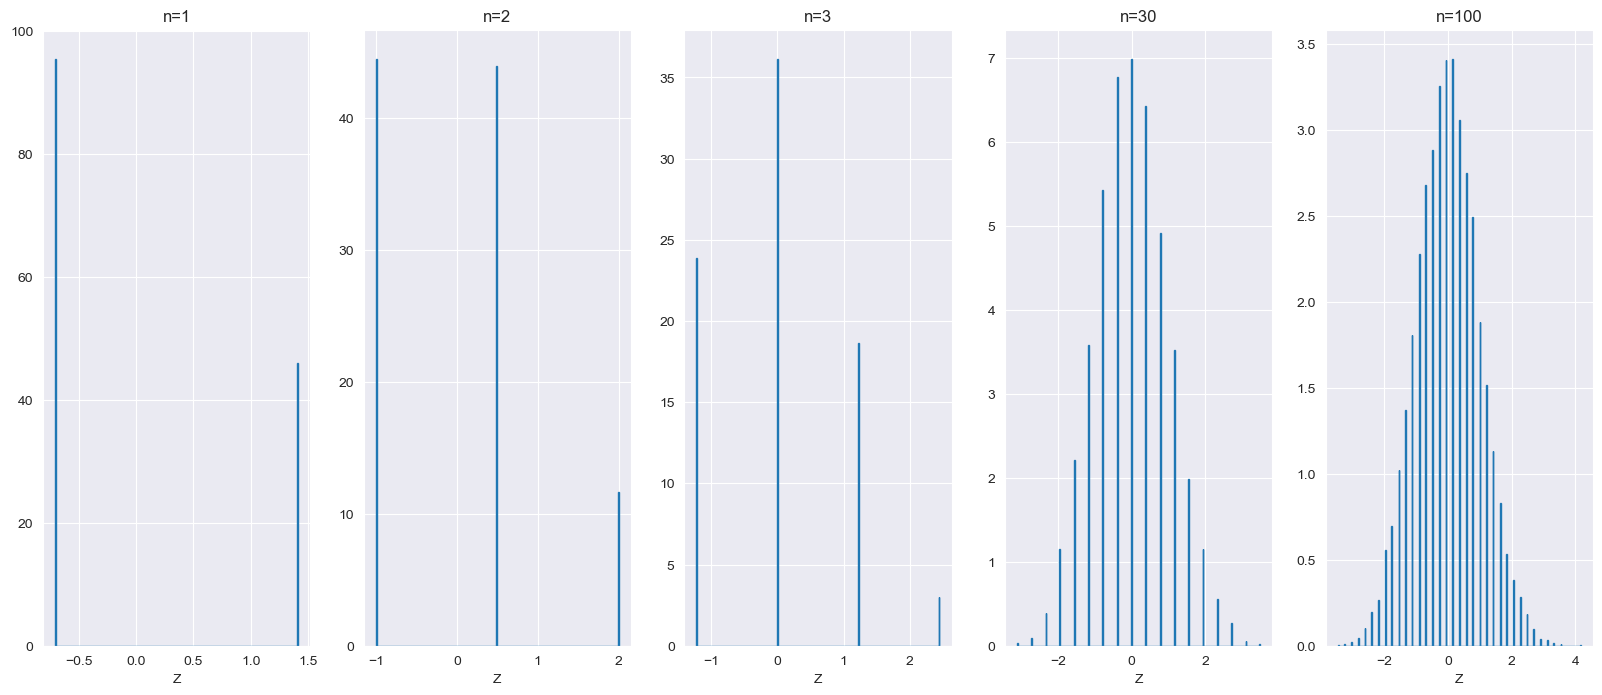

In [3]:
arr = [1,2,3,30,100]
m = 10000
p = 1/3
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZBernoulli(n,p)
    zs = []
    for i in range(m):
        zs.append(z.get())
    zs.sort()
    vals.append(zs)
    axs[ix].hist(zs, bins=300, density=True, histtype='step')
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
    
#print(vals)    
plt.show()

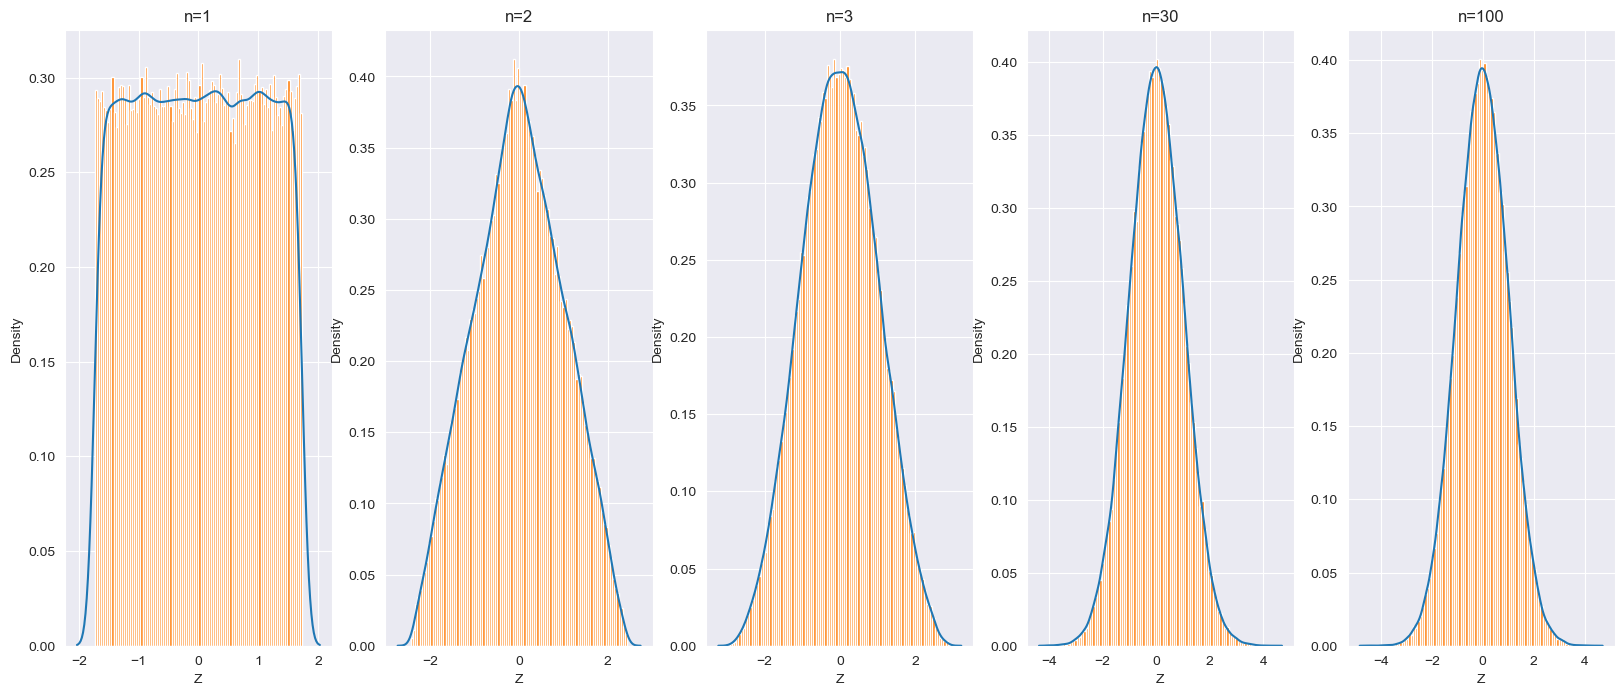

In [4]:
arr = [1,2,3,30,100]
m = 100000
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZUniform(n)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    sns.kdeplot(zs, ax=axs[ix])
    
    # x = np.linspace(-4, 4, 1000)
    # pdf = stats.norm.pdf(x, 0,1)
    # u_pdf = stats.uniform.pdf(x, -np.sqrt(3), 2*np.sqrt(3))
    #  
    # if n==1:
    #     axs[ix].plot(x, u_pdf, 'r')
    # else:
    #     axs[ix].plot(x, pdf, 'r')
    axs[ix].hist(zs, bins=100, density=True)
    
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
plt.show()

## Exercise 2

### Subtask a)

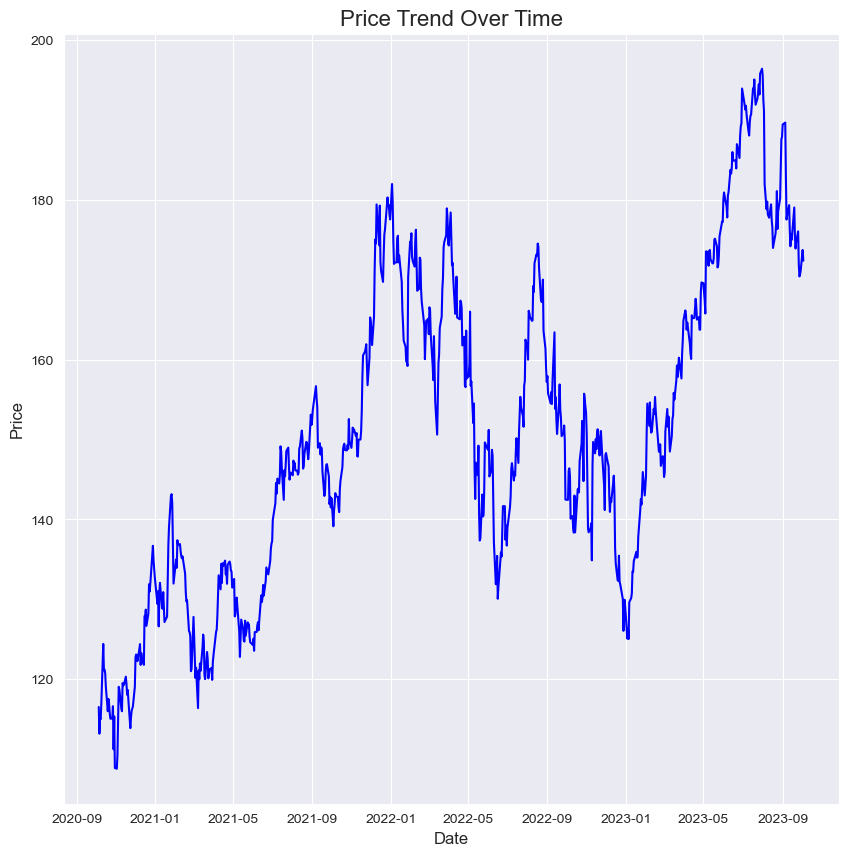

In [5]:
daily_data = pd.read_csv("data/DailyData - STOCK_US_XNAS_AAPL.csv")
#print(daily_data)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.sort_values('Date', inplace=True)
daily_data.set_index('Date', inplace=True)
plt.figure(figsize=(10,10))
plt.title('Price Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(daily_data.index, daily_data.Close, linestyle='-', color='b', label='Price')
plt.show()
#print(daily_data)

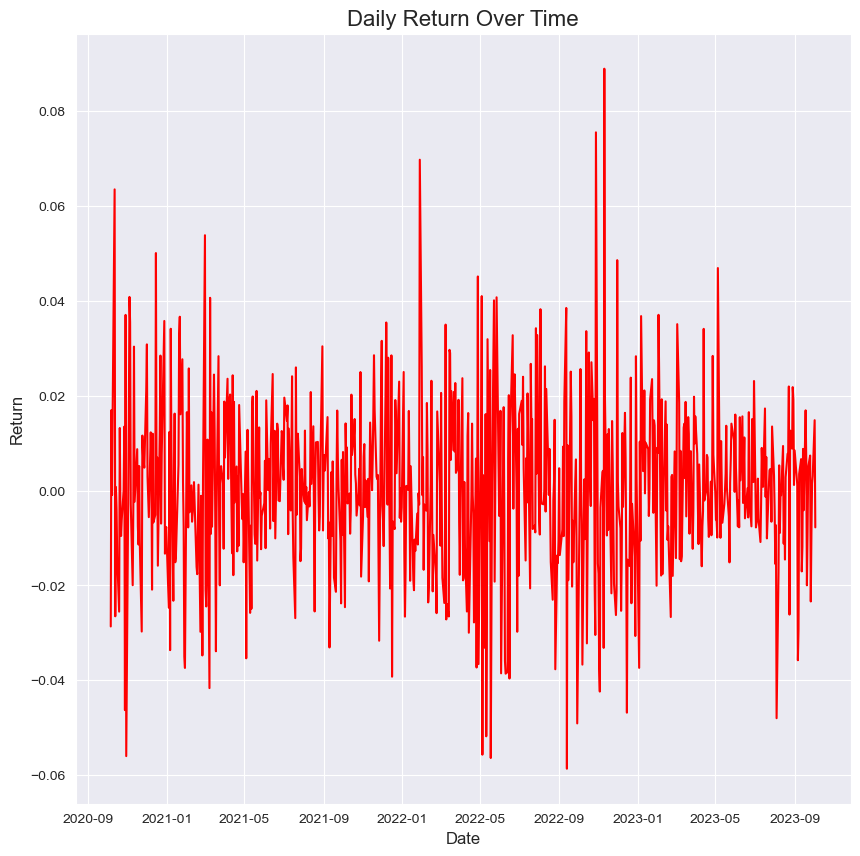

In [6]:
daily_data['Return'] = daily_data['Close'].pct_change()
plt.figure(figsize=(10,10))
plt.title('Daily Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.plot(daily_data.index, daily_data.Return, linestyle='-', color='r', label='Return')
plt.show()

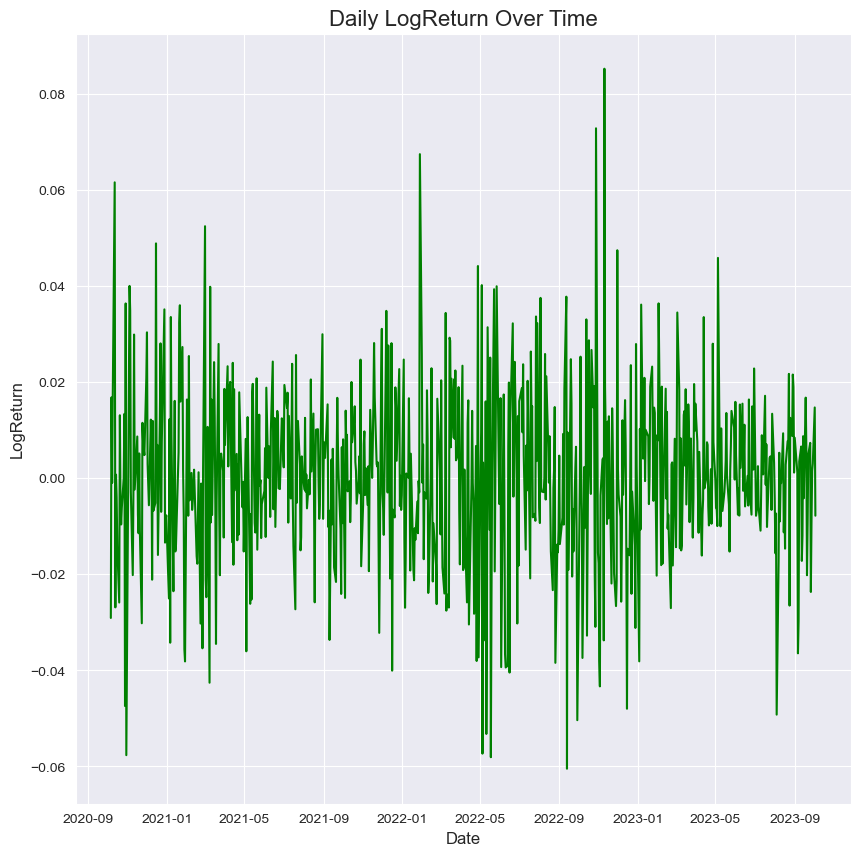

In [7]:
# plot daily logreturn
daily_data['LogReturn'] =   np.log(daily_data['Close']) - np.log(daily_data['Close'].shift(1))  

plt.figure(figsize=(10,10))
plt.title('Daily LogReturn Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('LogReturn', fontsize=12)
plt.plot(daily_data.index, daily_data.LogReturn, linestyle='-', color='g', label='LogReturn')
plt.show()

The daily return and daily log return can be assumed to be equal when the returns are small, for which we can approximate $$\ln(\frac{S_{x}}{S_{x-1}}) \approx \frac{S_{x}-S_{x-1}}{S_{x-1}}$$

### Subtask b)

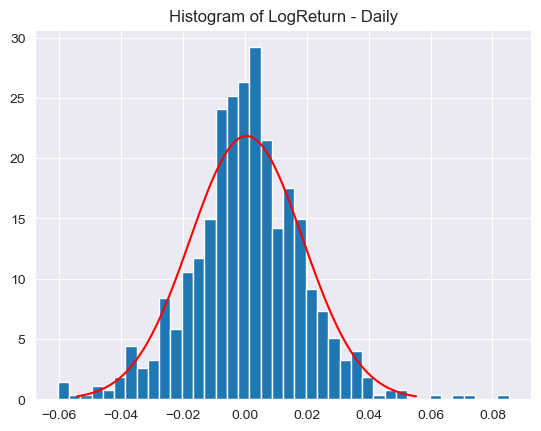

Mean of LogReturn:  0.0005211783048189329
Variance of LogReturn:  0.00033345761273272914


In [8]:
mean = daily_data.LogReturn.mean()
variance = daily_data.LogReturn.var()
stddev = np.sqrt(variance)


plt.hist(daily_data.LogReturn, bins=40, density = True)
plt.title("Histogram of LogReturn - Daily")
x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()



print("Mean of LogReturn: ", mean)
print("Variance of LogReturn: ", variance)


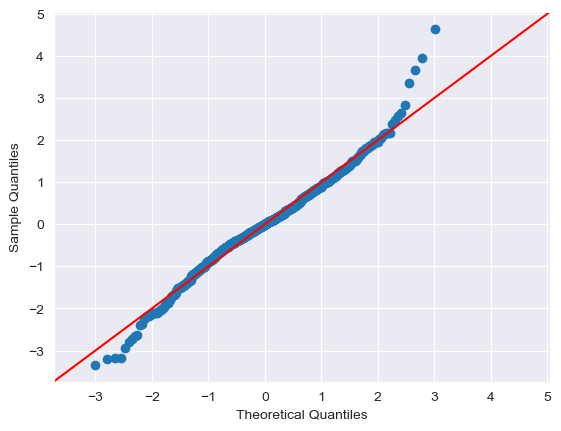

In [9]:
foo = daily_data['LogReturn']
foo = foo.dropna()
#print(foo)
fig = sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

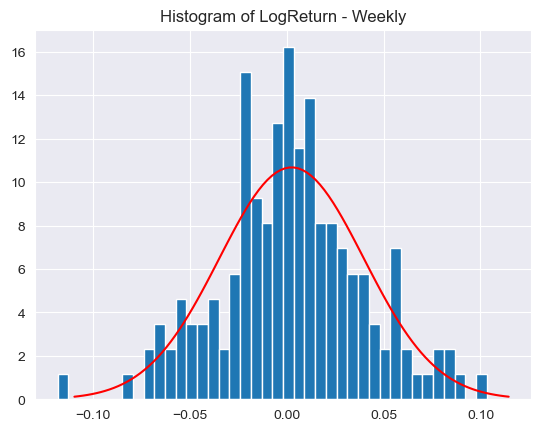

In [10]:
weekly_data = pd.read_csv("data/WeeklyData - STOCK_US_XNAS_AAPL.csv")
# print(daily_data)
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
weekly_data.sort_values('Date', inplace=True)
weekly_data.set_index('Date', inplace=True)
weekly_data['LogReturn'] = np.log(weekly_data['Close']) - np.log(weekly_data['Close'].shift(1))


plt.hist(weekly_data.LogReturn, bins=40, density = True)
plt.title("Histogram of LogReturn - Weekly")

mean = weekly_data.LogReturn.mean()
variance = weekly_data.LogReturn.var()
stddev = np.sqrt(variance)

x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()


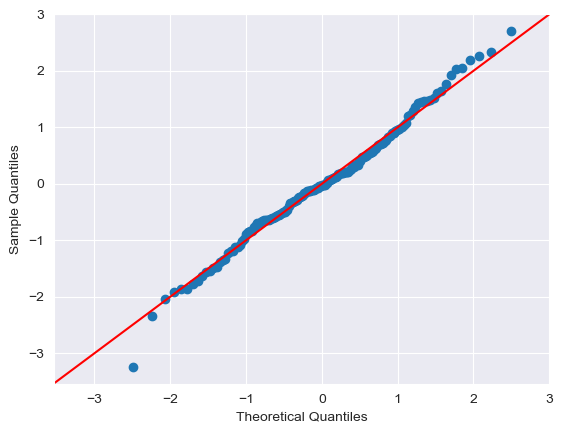

In [11]:
foo = weekly_data['LogReturn']
foo = foo.dropna()
#print(foo)
sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

The daily data has a fatter tail than the normal distribution, while the weekly data has a thinner tail. This is also visible in the QQ plot, where the daily data has a more pronounced curvature than the weekly data. As such, the weekly data is better approximated by a normal distribution than the daily data.

### Subtask c)

From the equation (6.9) from the book and the calculation above we can deduce the correlation between logreturns and drift and volatility as follows:
$$\log(\frac{S_{t+1}}{S_t}) = (\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i )+ \sigma \sqrt{(t_{i+1} - t_i )} Z_i$$
, which follows a normal distribution $N((\mu - \frac{\sigma^2}{2})(t_{i+1} - t_i), \sigma^2(t_{i+1} - t_i))$.

Since we have already calculated the mean and variance at the previous subpoint, it is now easy to calculate the annualized drift and volatility. ($ \mu = (\hat\mu + \frac{\hat{\sigma}^2}{2}) * n $ and $\sigma = \hat\sigma * \sqrt{n} $, where n is the number of trading periods per year)

In [12]:
def drift_volatility(mean, variance, n):
    mu = (mean - variance/2) * n
    sigma = np.sqrt(variance * n)
    return mu, sigma

annual_drift_d, annual_volatility_d = drift_volatility(daily_data.LogReturn.mean(), daily_data.LogReturn.var(), 252)
annual_drift_w, annual_volatility_w = drift_volatility(weekly_data.LogReturn.mean(), weekly_data.LogReturn.var(), 52)

print("Annualized drift and volatility for daily data: ", annual_drift_d.__round__(4), annual_volatility_d.__round__(4))
print("Annualized drift and volatility for weekly data: ", annual_drift_w.__round__(4), annual_volatility_w.__round__(4))

Annualized drift and volatility for daily data:  0.0893 0.2899
Annualized drift and volatility for weekly data:  0.093 0.2694


## Exercise 3
### Subtask a)

In [13]:
def step(S_ti, mu, sigma, T, L):
    """
    Uses the discrete price model to calculate $$S_{t+1}$$
    :param S_ti: The price at time ti
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L: Time steps
    :return: S_{t+1}
    """
    dt = T/L
    return S_ti * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0,1))

In [14]:
def simulate(S0, mu, sigma, T, L_arr, M=1, sum_squares = False, plot = False, hist = False):
    """
    Simulates the price of a stock using the discrete time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L_arr: Time steps (array)
    :param M: Number of simulations
    :param sum_squares: Whether to return the running sum of square increments
    :param plot: Whether to plot the price evolution of the stock
    :param hist: Whether to plot the histogram of the final prices
    """
    if plot and hist:
        raise ValueError("Cannot plot both the price evolution and the histogram")
    
    S_Ts = []
    S_s = []
    for L in L_arr:
        S_T = []
        for x in range (M):
                S = [S0]
                for i in range(L):
                    S.append(step(S[-1], mu, sigma, T, L))
                S_T.append(S[-1])
                S_s.append(S)        
                if plot:
                    plt.plot(S, color = 'gray', linewidth=0.5)
        if hist:
            plt.hist(S_T, bins=100)
            plt.title(f'L={L}, M={M}')
            plt.axvline(x=S0, color='r', linestyle='--')
            plt.show()
        S_Ts.append(S_T)  

        if plot:
            plt.title(f'$ \\Delta $t ={T}, $ \\delta $t={T/L}')
            plt.show()
    #print(S_Ts)
    #print(S_s)
    if sum_squares:
        S_np = np.array(S_s)
        diff  = np.diff(S_np, axis=1)**2
        diff = diff[:, :-1]
        SSIs = diff
        return S_Ts, SSIs
    return S_Ts

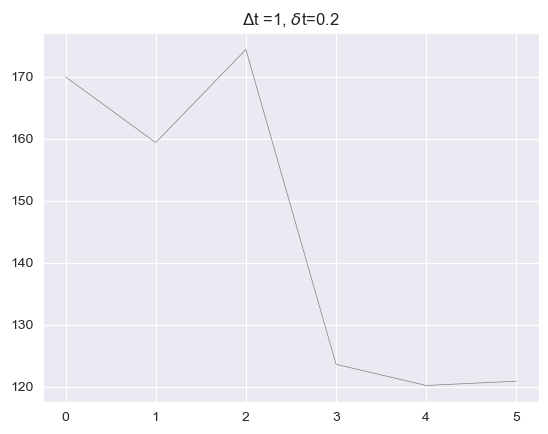

[[120.91417874345677]]

In [15]:
T = 1
S0 = 170
sigma = 0.344
mu = 0.1

L = [5]

M = 5000

simulate(S0, mu, sigma, T, L,M=1, plot=True, hist=False)

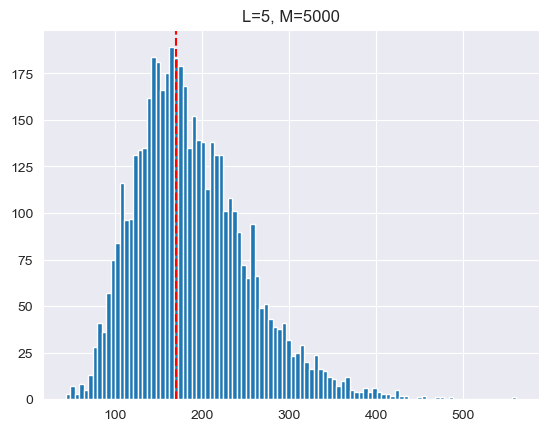

_


In [16]:
simulate(S0, mu, sigma, T, L,M=5000, plot=False, hist=True)
print("_")

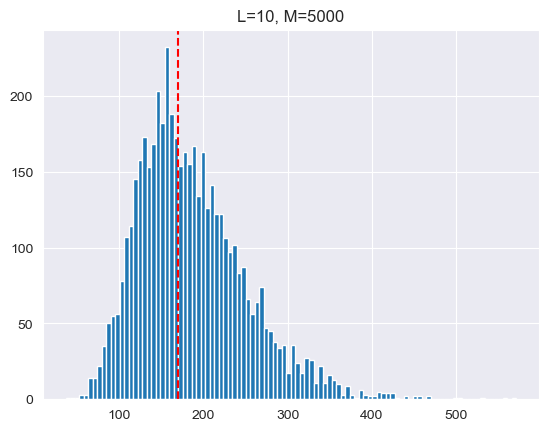

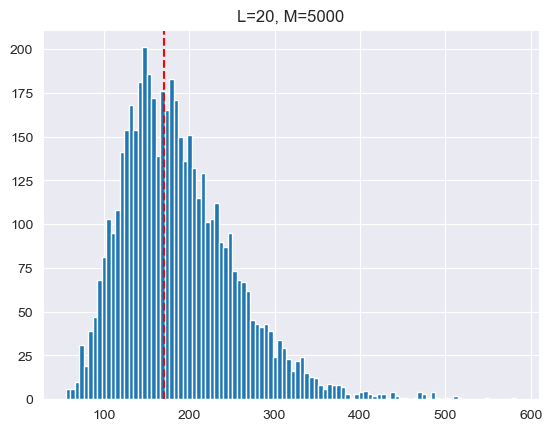

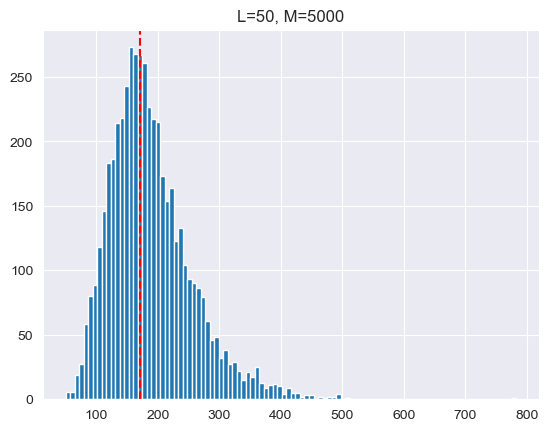

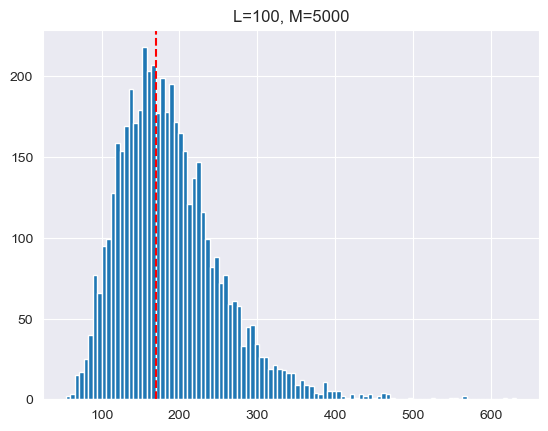

_


In [17]:
simulate(S0, mu, sigma, T, L_arr=[10,20,50,100],M=5000, plot=False, hist=True)
print("_")

### Subtask b)

In [18]:
def cont_time_model(S0, mu, sigma, T, M):
    """
    Simulates the price of a stock using the continuous time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param M: Number of simulations
    """
    S_T = []
    for x in range (M):
        S_T.append(S0 * np.exp((mu - sigma**2/2)*T + sigma*np.sqrt(T)*np.random.normal(0,1)))
    return S_T



[112.31987579 204.30137192 345.78614711 ... 180.7867521  216.39246112
 238.06256989]


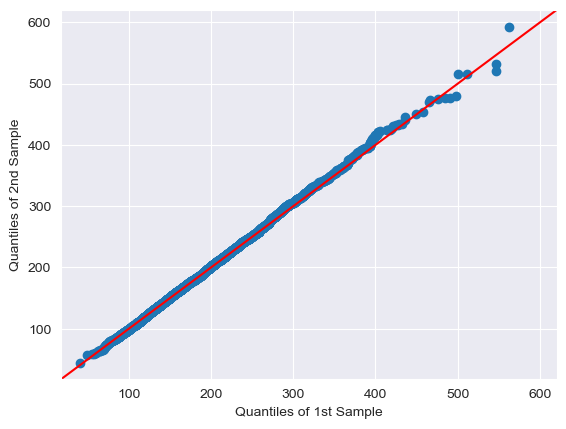

In [19]:
S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=5000, plot=False, hist=False)
S_t_disc = np.array(S_t[0])
print(S_t_disc)
S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=5000))


sm.qqplot_2samples(S_t_cont, S_t_disc, line='45')
plt.show()


In [40]:
for M in [50,500,5000,50000]:
    S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=M, plot=False, hist=False)
    S_t_disc = np.array(S_t[0])
    S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=M))
    print(f"M = {M}\n Continuous mean: {S_t_cont.mean()}, var: {S_t_cont.var()}")
    print(f" Discrete mean: {S_t_disc.mean()}, var: {S_t_disc.var()}")

M = 50
 Continuous mean: 188.75283992142076, var: 3646.392427212199
 Discrete mean: 196.32091816723468, var: 4055.4149751757004
M = 500
 Continuous mean: 188.3933566516377, var: 4701.462539274615
 Discrete mean: 190.5740723743884, var: 4659.200246615118
M = 5000
 Continuous mean: 189.26856735087344, var: 4626.29197687681
 Discrete mean: 186.25785850164155, var: 4254.544003475675
M = 50000
 Continuous mean: 187.07661940559183, var: 4332.045537323785
 Discrete mean: 187.7714870257129, var: 4417.819076742911


### Subtask c)

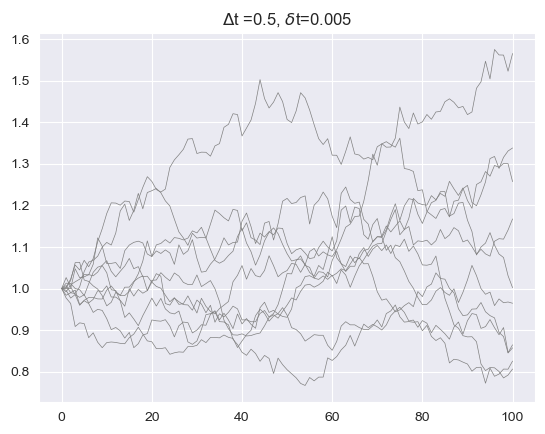

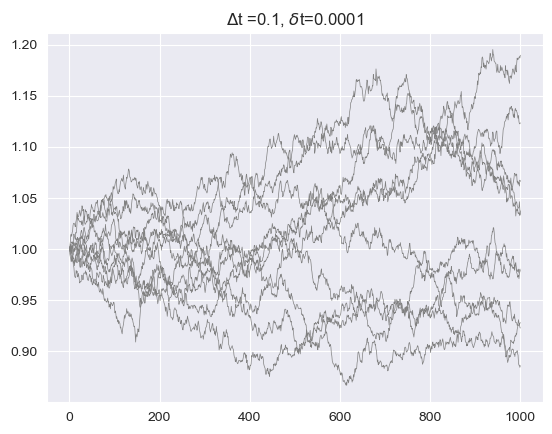

[1.29867964e-06 3.34978568e-04 2.17417585e-03 2.17480462e-03
 3.98436448e-03 3.99659277e-03 4.11059999e-03 4.16958505e-03
 4.42171253e-03 5.02259051e-03 5.09479582e-03 5.67608573e-03
 5.73062113e-03 6.11767389e-03 6.11773718e-03 6.30387120e-03
 6.36962389e-03 6.39759319e-03 7.66602858e-03 8.28329317e-03
 8.28410848e-03 8.59408687e-03 8.71461810e-03 8.78743737e-03
 9.13796756e-03 9.19349355e-03 9.42711509e-03 9.45121319e-03
 9.45121782e-03 9.96820939e-03 1.07460897e-02 1.07959435e-02
 1.08505454e-02 1.12359202e-02 1.21682602e-02 1.42065615e-02
 1.46289918e-02 1.48455786e-02 1.48461188e-02 1.48556589e-02
 1.48821275e-02 1.48833445e-02 1.48965180e-02 1.49024097e-02
 1.52037294e-02 1.56144994e-02 1.56532556e-02 1.57200284e-02
 1.59920065e-02 1.62183290e-02 1.65194550e-02 1.65454806e-02
 1.69781247e-02 1.71999942e-02 1.72047847e-02 1.72545690e-02
 1.72864611e-02 1.73609613e-02 1.78463570e-02 1.79350941e-02
 1.79801646e-02 1.80912403e-02 1.81083846e-02 1.83596743e-02
 1.86282048e-02 1.863989

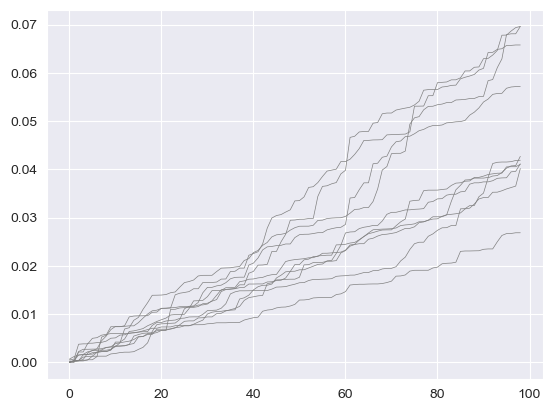

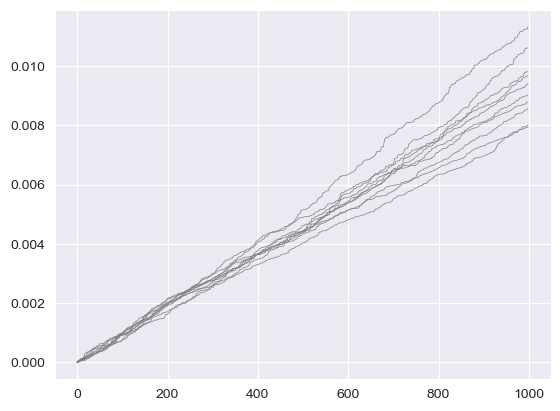

In [43]:
a,b = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[100], T=0.5, M=10,sum_squares=True, plot=True, hist=False)
c,d = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[1000], T=0.1, M=10, sum_squares=True, plot=True, hist=False)
#print(str(b.shape))

print(np.cumsum(b[0]))
for i in range(10):
    plt.plot(np.cumsum(b[i]), color='gray', linewidth=0.5)
plt.show()
for i in range(10):
    plt.plot(np.cumsum(d[i]), color='gray', linewidth=0.5)
plt.show()
#print("_")

## Exercise 4

### Subtask a)

## Exercise 5

### Subtask a)

In [22]:
E = 170
S0 = 170
T = 1
L = 100 
delta_t = 0.01
r = 0.05
sigma = 0.344
mu = 0.1

In [58]:
def simulate_portfolio(plot = False, S_0 = 170, seed=42, verbose=False):
    """
    Simulates the portfolio value over time
    :param plot: whether to plot the results
    :param S_0: the initial price of the asset
    :param seed: 
    :return: 
    """
    
    
    np.random.seed(seed)
    d1 = ((np.log(S_0/E) + (r + (sigma**2)/2))*T)/(sigma*np.sqrt(T))
    #print(d1)
    delta = [stats.norm.cdf(d1)-1]
    cash = [100]
    S = [S_0]
    port = [delta[0]*S[0] + cash[0]]
    for i in range(1, L):
        S.append(step(S[-1], mu, sigma, T, L))
        new_port_a = delta[-1]*S[-1] + cash[-1]*(1+r*delta_t)
        
        d1 = (np.log(S[-1]/E) + (r + (sigma**2)/2)*(T-i*delta_t))/(sigma*np.sqrt(T-i*delta_t))
        delta.append(stats.norm.cdf(d1)-1)
        
        new_cash = cash[-1]*(1+r*delta_t) + (delta[-2] - delta[-1])*S[-1]
        cash.append(new_cash)
            
        new_port_b = delta[-1]*S[-1] + cash[-1]
        assert abs(new_port_a - new_port_b) < 1e-3
        port.append(new_port_b)
        
    if plot:
        
        plt.figure(figsize=(10,1.5))
        plt.plot(S)
        plt.title('Asset Path')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(port)
        plt.title('Portfolio Value')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(cash)
        plt.title('Cash')
        plt.show()
        
        plt.figure(figsize=(10,1.5))
        plt.plot(delta)
        plt.title('Delta')
        plt.show()
        #print(delta)
    if verbose:
        if S[-1] > E:
            print("Option is out the money")
        else:
            print("Option is in the money")
    # print(port[-1]+(E-S[-1])*np.exp(r*T))
    # print(S[-1])
    return S[-1], port[-1]+(E-port[0])*np.exp(r*T)

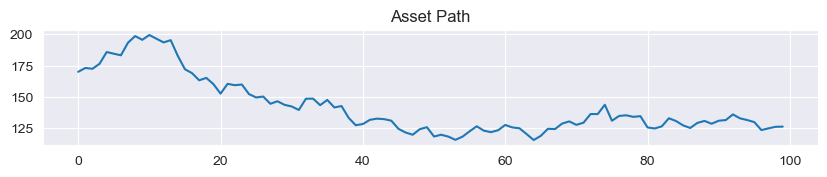

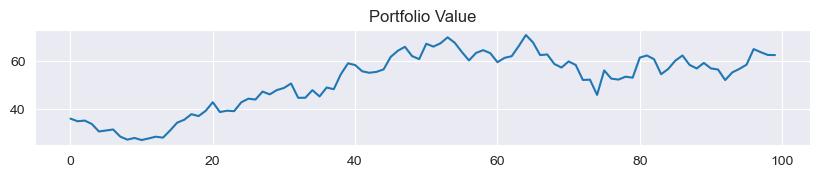

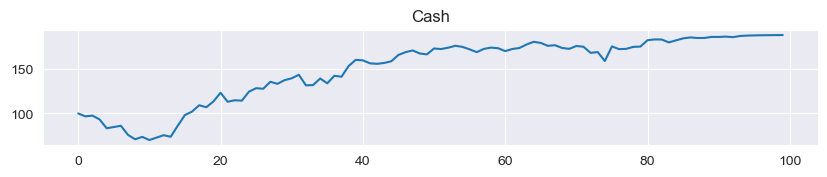

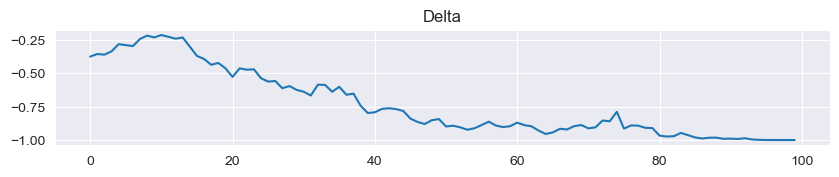

Option is in the money
_


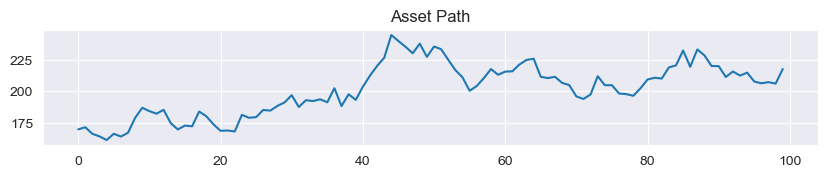

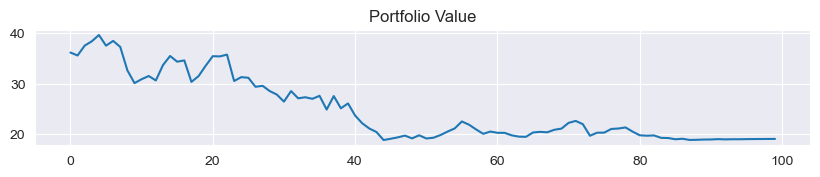

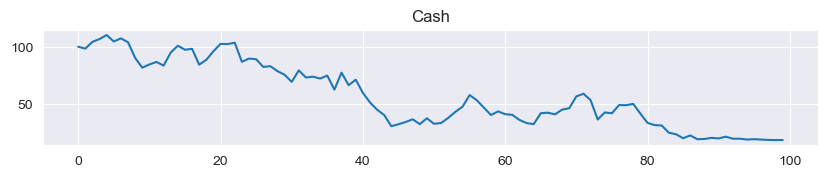

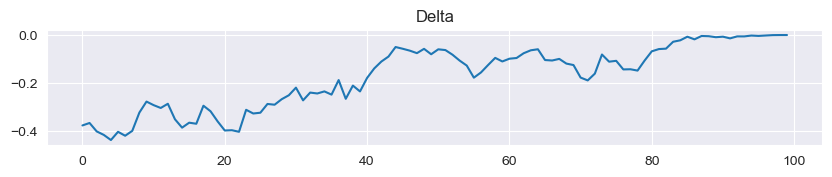

Option is out the money


(217.565195212, 159.81236308580915)

In [59]:
simulate_portfolio(True, seed=42, verbose=True)
print("_")
simulate_portfolio(True, seed=43, verbose=True)

### Subtask b)

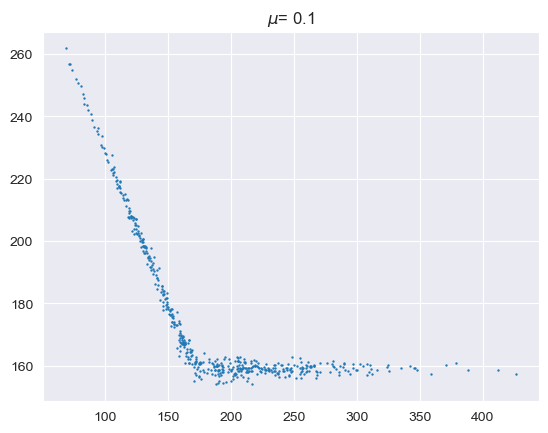

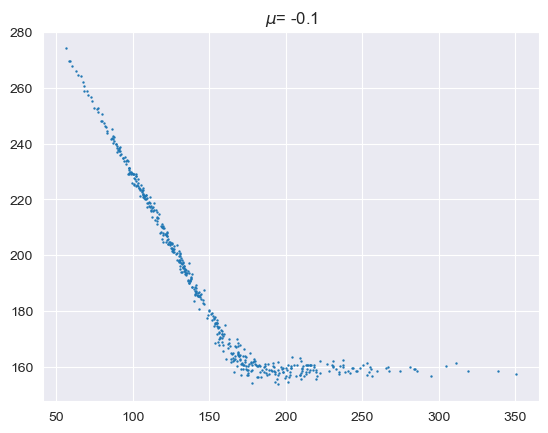

In [64]:
M=500
xs = []
ys= []
for i in range(M):
    x,y = simulate_portfolio(seed=i)
    xs.append(x)
    ys.append(y)
# smaller dot size
plt.title("$\\mu$= "+str(mu))
plt.scatter(xs, ys, s=0.5)
plt.show()

xs = []
ys= []
mu = -0.1
for i in range(M):
    x,y = simulate_portfolio(seed=i)
    xs.append(x)
    ys.append(y)

plt.title("$\\mu$= "+str(mu))
plt.scatter(xs, ys, s=0.5)
plt.show()
